<a href="https://colab.research.google.com/github/santosh5541/lina-chato-knn/blob/main/FlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary modules/libraries
from sklearn.neighbors import KNeighborsClassifier # Import KNN classifier
from sklearn.model_selection import train_test_split # call the function that will split the data into train and test
from sklearn.datasets import load_iris # Some datasets are stored in the ML library (sklearn), such as Iris data, and MNIST
import numpy as np # for calculations
import matplotlib.pyplot as plt # for plot graphs

from sklearn.metrics import accuracy_score, confusion_matrix # evaluation measures
import seaborn as sns

irisData = load_iris()

# Create feature and target arrays
# y contains integer encoded species labels
# yname contains the actual species names corresponding to the target values (Setosa, Versicolor, Virginica)
X = irisData.data
y = irisData.target
yname = irisData.target_names

print("Length of the data:", len(X))

Length of the data: 150


In [ ]:
# Let's check what we have in the first X (or X[1]), and Y (or Y[1]).
# Note: X[i] is a feature vector and Y[i] is the target (i.e., class label),
# where i is the sample number.

# Print the first element of each
print("First element of X (features):")
print(X[0])

print("\nFirst element of y (target):")
print(y[0])

print("\nFirst element of yname (target names):")
print(yname[y[0]])


First element of X (features):
[5.1 3.5 1.4 0.2]

First element of y (target):
0

First element of yname (target names):
setosa


In [ ]:
# Split data into training and test set
# test_size = 0.2 means 20% data samples are selected as test set to implement predictions
# and test the performance of the KNN, while the remaining 80% of data are used as training data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Length of training data:", len(X_train))
print("Length of test data:", len(X_test))


Length of training data: 120
Length of test data: 30


In [ ]:
# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model using the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of KNN classifier with K=3: {accuracy * 100:.2f}%")

Accuracy of KNN classifier with K=3: 100.00%


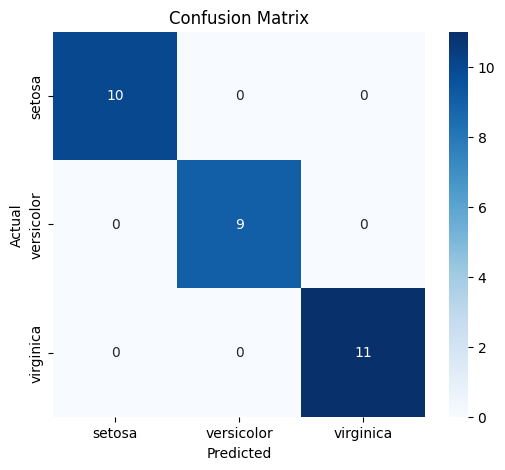

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=irisData.target_names,
            yticklabels=irisData.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

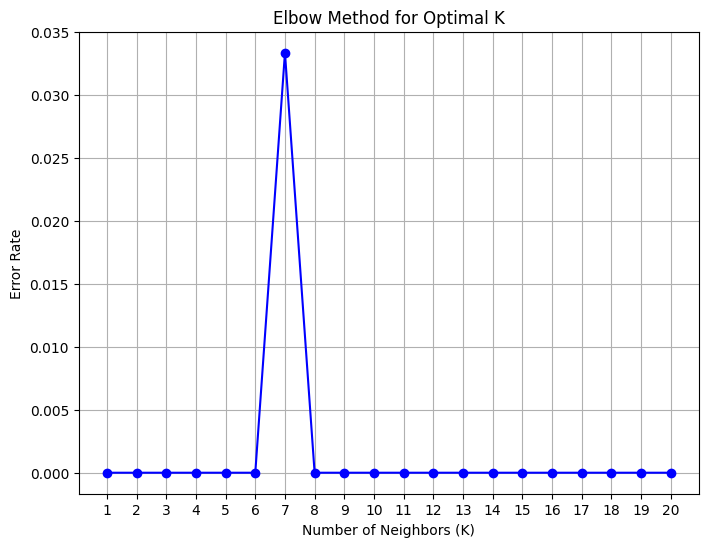

In [ ]:
# Initialize lists to store the error values for each K
k_range = range(1, 21)  # Test K values from 1 to 20
errors = []

# Loop over the range of k values to calculate accuracy for each one
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Make predictions
    error = 1 - accuracy_score(y_test, y_pred)  # Calculate the error
    errors.append(error)

# Plot the error for each value of K to find the "elbow"
plt.figure(figsize=(8, 6))
plt.plot(k_range, errors, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Error Rate")
plt.xticks(k_range)
plt.grid(True)
plt.show()
